# Postprocessing trajectories at 400K to Boltzmann at 300K

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
resultstmp = np.load('/Users/zofia/github/DFM/Results/Alanine/T400/Postprocessed/results.npy')
results=resultstmp[()]
reftmp = np.load('/Users/zofia/github/DFM/Results/Alanine/T400/Postprocessed/ref.npy')
ref=reftmp[()]
nrPoints = [49300, 98600, 246500]
angleNames=["phi", "psi"]

#print(ref[()]['FE'])

for nrp in nrPoints:
    
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(121)

    ax.plot(ref['bc']["psi"] ,ref['FE']["psi"], 'r' )
    ax.plot(results[nrp]["psi"]['bc_raw'] ,results[nrp]["psi"]['fe_raw'] , 'k')
    ax.plot(results[nrp]["psi"]['bc_unb'] ,results[nrp]["psi"]['fe_unb'] , 'g')
    ax.plot(results[nrp]["psi"]['bc_unb2'] ,results[nrp]["psi"]['fe_unb2'] , 'b')
    ax.set_xlabel("psi")
    ax.legend(['reference', 'raw', 'w=q/pi', 'w=phi_0'])
    
    ax2 = fig.add_subplot(122)

    ax2.plot(ref['bc']["phi"] ,ref['FE']["phi"], 'r' )
    ax2.plot(results[nrp]["phi"]['bc_raw'] ,results[nrp]["phi"]['fe_raw'] , 'k')
    ax2.plot(results[nrp]["phi"]['bc_unb'] ,results[nrp]["phi"]['fe_unb'] , 'g')
    ax2.plot(results[nrp]["phi"]['bc_unb2'] ,results[nrp]["phi"]['fe_unb2'] , 'b')
    ax2.set_xlabel("phi")
    ax2.legend(['reference', 'raw', 'w=q/pi', 'w=phi_0'])
    
    plt.show()




FileNotFoundError: [Errno 2] No such file or directory: '/Users/zofia/github/DFM/Results/Alanine/T400/Postprocessed/results.npy'

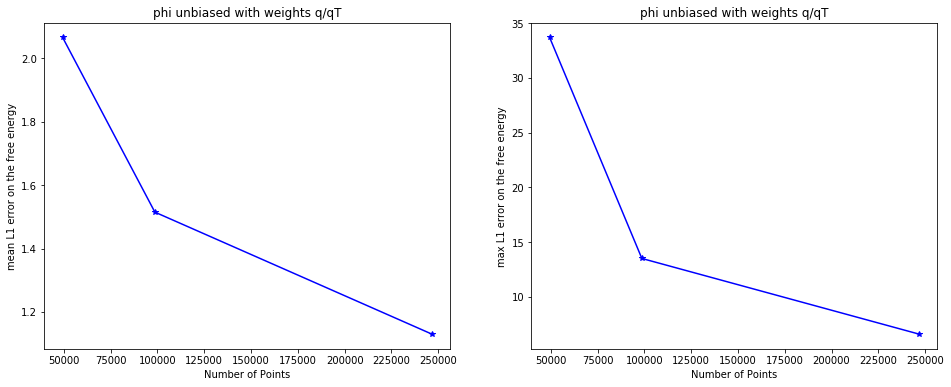

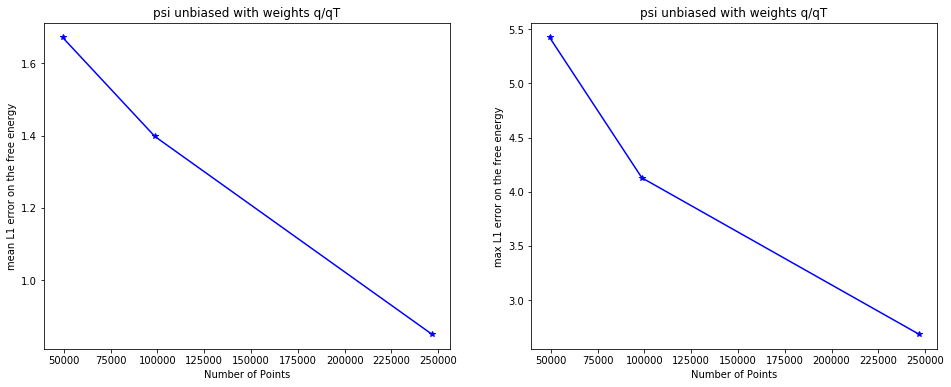

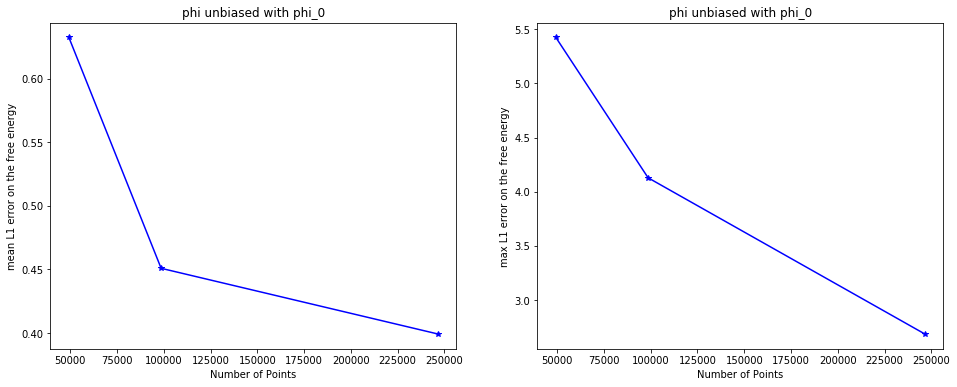

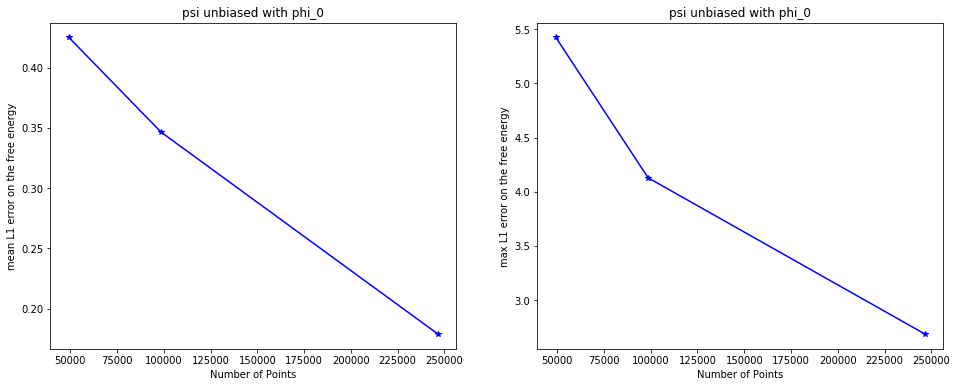

In [4]:
for ph in angleNames:
    err = list()
    errMax = list()

    for nrp in nrPoints:
        
        rf = ref['FE'][ph]
        X = results[nrp][ph]['fe_unb']
        
        inf_idx = np.argwhere(np.logical_not(np.isinf(X)))
        rf = rf[inf_idx]
        X = X[inf_idx]
        
        inf_idx = np.argwhere(np.logical_not(np.isinf(rf)))
        rf = rf[inf_idx]
        X = X[inf_idx]
        
        L1 = np.mean(np.abs(rf - X)/np.abs(rf))
        err.append(L1)
        
        L1max = np.max(np.abs(rf - X)/np.abs(rf))
        errMax.append(L1max)
        
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(121)
    ax.plot(nrPoints, err, '-*b')
    ax.set_xlabel('Number of Points')
    ax.set_ylabel('mean L1 error on the free energy')
    ax.set_title(str(ph)+' unbiased with weights q/qT')
    
    
    ax2 = fig.add_subplot(122)
    ax2.plot(nrPoints, errMax, '-*b')
    ax2.set_xlabel('Number of Points')
    ax2.set_ylabel('max L1 error on the free energy')
    ax2.set_title(str(ph)+' unbiased with weights q/qT')
    
    plt.show()
    
# unb2
for ph in angleNames:
    err = list()

    for nrp in nrPoints:
        
        rf = ref['FE'][ph]
        X = results[nrp][ph]['fe_unb2']
        
        inf_idx = np.argwhere(np.logical_not(np.isinf(X)))
        rf = rf[inf_idx]
        X = X[inf_idx]
        
        inf_idx = np.argwhere(np.logical_not(np.isinf(rf)))
        rf = rf[inf_idx]
        X = X[inf_idx]
        
        L1 = np.mean(np.abs(rf - X)/np.abs(rf))
        err.append(L1)
        
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(121)
    ax.plot(nrPoints, err, '-*b')
    ax.set_xlabel('Number of Points')
    ax.set_ylabel('mean L1 error on the free energy')
    ax.set_title(str(ph)+' unbiased with phi_0')
    
    
    ax2 = fig.add_subplot(122)
    ax2.plot(nrPoints, errMax, '-*b')
    ax2.set_xlabel('Number of Points')
    ax2.set_ylabel('max L1 error on the free energy')
    ax2.set_title(str(ph)+' unbiased with phi_0')
    
    
    plt.show()



